In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('sample_data.csv')

In [3]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [4]:
# how many unique value are present and what are those unique values

In [5]:
data['rideable_type'].nunique()

3

In [6]:
data['rideable_type'].unique()

array(['classic_bike', 'docked_bike', 'electric_bike'], dtype=object)

In [7]:
data.rideable_type.nunique() #another method

3

In [8]:
data.rideable_type.unique() #another method

array(['classic_bike', 'docked_bike', 'electric_bike'], dtype=object)

In [9]:
# what are the no.of rides taken across different types of rideable

In [10]:
data['rideable_type'].value_counts()

classic_bike     214619
electric_bike     97897
docked_bike       24714
Name: rideable_type, dtype: int64

In [11]:
data.rideable_type.value_counts() #another method

classic_bike     214619
electric_bike     97897
docked_bike       24714
Name: rideable_type, dtype: int64

In [ ]:
# density of start latitude and start longitude

<AxesSubplot:xlabel='start_lng', ylabel='start_lat'>

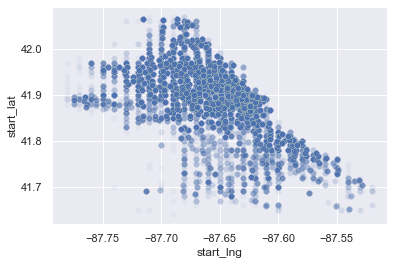

In [25]:
sns.scatterplot(x=data.start_lng,y=data.start_lat,alpha=0.05)

In [28]:
# density of end latitude and end longitude

<AxesSubplot:xlabel='end_lng', ylabel='end_lat'>

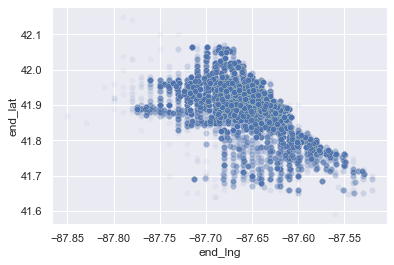

In [27]:
sns.scatterplot(x=data.end_lng,y=data.end_lat,alpha=0.05)

In [12]:
# how many values are missing in the dataset

In [13]:
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:>

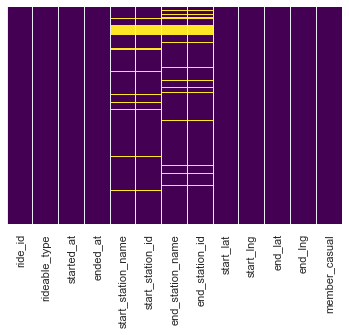

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# start station name,start station id,end station name,end station id have a lot of missing values so these columns cant be included in analysis.

In [16]:
# what type of customers are and their numbers

In [17]:
data['member_casual'].value_counts()

member    200629
casual    136601
Name: member_casual, dtype: int64

In [18]:
data.member_casual.value_counts() #another method

member    200629
casual    136601
Name: member_casual, dtype: int64

<AxesSubplot:xlabel='member_casual', ylabel='count'>

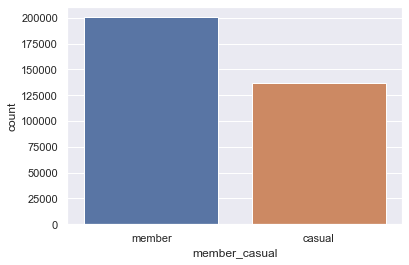

In [19]:
sns.countplot(x='member_casual',data=data) #plot for members vs casual riders

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

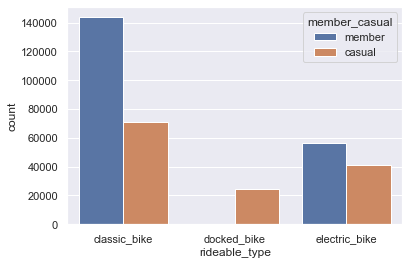

In [20]:
sns.countplot(x='rideable_type',hue='member_casual',data=data) #plot for rideable type preferred by member or casual riders

In [21]:
# what are the preference rideable type of casual customers

In [22]:
data[data['member_casual'] == 'casual']['rideable_type'].value_counts()

classic_bike     70776
electric_bike    41111
docked_bike      24714
Name: rideable_type, dtype: int64

In [23]:
# what are the preference rideable type of members customers

In [24]:
data[data['member_casual'] == 'member']['rideable_type'].value_counts()

classic_bike     143843
electric_bike     56786
Name: rideable_type, dtype: int64

In [25]:
# converting series to datetime format to grab day of week ,initally it was pandas.series we can check by type(data['started_at'])

In [26]:
data['started_at'] = pd.to_datetime(data['started_at']) 

In [27]:
data['ended_at'] = pd.to_datetime(data['ended_at']) 

In [28]:
data.started_at[0]

Timestamp('2021-04-12 18:25:36')

In [29]:
data['day_of_week'] = data['started_at'].dt.dayofweek # 0=monday,1=tuesday,==,6=sunday

In [30]:
data['day_of_week'].value_counts()

4    58724
5    54385
1    52226
6    50353
0    43761
3    40436
2    37345
Name: day_of_week, dtype: int64

In [31]:
data['day_of_week'].max() # maximum no.of rides are occuring on sunday

6

In [32]:
data['day_of_week'].min() # minimum no.of rides occuring on monday

0

In [33]:
# on sunday what type of rides are preferred by the customers

In [34]:
data[data['day_of_week'] == 6]['rideable_type'].value_counts()

classic_bike     32125
electric_bike    12776
docked_bike       5452
Name: rideable_type, dtype: int64

In [35]:
# who tend to travel more on sunday's (member or casual) 

In [36]:
data[data['day_of_week'] == 6]['member_casual'].value_counts() # almost the no.of casual and member are same (casual > member)

casual    25196
member    25157
Name: member_casual, dtype: int64

In [37]:
data[data['day_of_week'] == 0]['member_casual'].value_counts() # monday (member > casual)

member    27731
casual    16030
Name: member_casual, dtype: int64

In [38]:
data[data['day_of_week'] == 1]['member_casual'].value_counts() # tuesday (member > casual)

member    31849
casual    20377
Name: member_casual, dtype: int64

In [39]:
data[data['day_of_week'] == 2]['member_casual'].value_counts() # wed (member > casual)

member    25354
casual    11991
Name: member_casual, dtype: int64

In [40]:
data[data['day_of_week'] == 3]['member_casual'].value_counts() # thrusday (member > casual)

member    28086
casual    12350
Name: member_casual, dtype: int64

In [41]:
data[data['day_of_week'] == 4]['member_casual'].value_counts() #friday (member > casual)

member    35795
casual    22929
Name: member_casual, dtype: int64

In [42]:
data[data['day_of_week'] == 5]['member_casual'].value_counts() #saturday (casual > member)

casual    27728
member    26657
Name: member_casual, dtype: int64

In [43]:
# on weekends i.e saturday and sunday the number of causal riders is more than member riders

In [44]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5


In [45]:
# finding some data using multiple conditions

In [46]:
data[(data['ride_id']=='1E0145613A209000')& (data['rideable_type'] == 'docked_bike') & (data['end_station_id'] == 'KA1503000069') & data['day_of_week']== 1]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1


In [47]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5


In [48]:
# calculating the journey in minutes


In [49]:
data['journey_time'] = data['ended_at'] - data['started_at']

In [50]:
data['journey_time']

0        0 days 00:31:19
1        0 days 01:04:18
2        3 days 22:57:39
3        0 days 00:25:06
4        0 days 01:31:17
               ...      
337225   0 days 00:07:13
337226   0 days 01:14:03
337227   0 days 00:57:04
337228   0 days 00:05:26
337229   0 days 00:18:51
Name: journey_time, Length: 337230, dtype: timedelta64[ns]

In [51]:
data['journey_time'].max() #maximum journey duration someone must have rented the bike for a month or more

Timedelta('33 days 04:16:42')

In [52]:
# counting how many rides are taken from each station

In [53]:
data['start_station_name'].nunique()

681

In [54]:
data['start_station_name'].unique()

array(['State St & Pearson St', 'Dorchester Ave & 49th St',
       'Loomis Blvd & 84th St', 'Honore St & Division St',
       'Clinton St & Polk St', 'Ashland Ave & 63rd St',
       'Halsted St & 69th St', 'Damen Ave & Cortland St',
       'Indiana Ave & Roosevelt Rd', 'Lincoln Ave & Waveland Ave',
       'Wood St & Chicago Ave', 'MLK Jr Dr & 29th St',
       'Southport Ave & Waveland Ave', 'Racine Ave & Fullerton Ave',
       'MLK Jr Dr & 63rd St', 'Richmond St & Diversey Ave',
       'Broadway & Berwyn Ave', 'Broadway & Ridge Ave',
       'Racine Ave & Congress Pkwy', 'Western Ave & Howard St',
       'Marshfield Ave & 59th St', 'Clark St & Berwyn Ave',
       'Central Park Ave & 24th St', 'Franklin St & Monroe St',
       'New St & Illinois St', 'Cottage Grove Ave & 67th St',
       'Halsted St & 73rd St', 'Lake Park Ave & 53rd St',
       'Halsted St & Maxwell St', 'Orleans St & Hubbard St',
       'Racine Ave & 13th St', 'Greenwood Ave & 79th St',
       'Albany Ave & 26th St', 'M

In [55]:
# which station has maximum no.of rides taken

In [56]:
data['start_station_name'].value_counts() #The no.of rides from each station

Lake Shore Dr & Monroe St    3705
Streeter Dr & Grand Ave      3363
Millennium Park              2612
Clark St & Elm St            2605
Michigan Ave & Oak St        2575
                             ... 
Altgeld Gardens                 2
Hampden Ct & Diversey Ave       1
MLK Jr Dr & 83rd St             1
State St & 76th St              1
Carpenter St & 63rd St          1
Name: start_station_name, Length: 681, dtype: int64

In [57]:
data['end_station_name'].value_counts() # The no.of rides fron ended station

Lake Shore Dr & Monroe St    3500
Streeter Dr & Grand Ave      3284
Millennium Park              2766
Clark St & Elm St            2656
Michigan Ave & Oak St        2654
                             ... 
Laramie Ave & Gladys Ave        1
Kostner Ave & Lake St           1
State St & 76th St              1
Kedzie Ave & 104th St           1
Halsted St & 59th St            1
Name: end_station_name, Length: 681, dtype: int64

In [58]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,0 days 01:31:17


In [59]:
# average journey duration on each day

In [60]:
data[data['day_of_week'] == 0]['journey_time'].mean() # monday average journey duration

Timedelta('0 days 00:22:46.937615685')

In [61]:
data[data['day_of_week'] == 1]['journey_time'].mean() # tuesday average journey duration

Timedelta('0 days 00:24:15.297055106')

In [62]:
data[data['day_of_week'] == 2]['journey_time'].mean()# wednesday average journey duration

Timedelta('0 days 00:21:22.389208729')

In [63]:
data[data['day_of_week'] == 3]['journey_time'].mean()#thrusday average journey duration which is minimum as compared as other days

Timedelta('0 days 00:16:50.331214759')

In [64]:
data[data['day_of_week'] == 4]['journey_time'].mean()# friday average journey duration

Timedelta('0 days 00:24:46.177150739')

In [65]:
data[data['day_of_week'] == 5]['journey_time'].mean() # saturday average journey duration

Timedelta('0 days 00:26:47.575121816')

In [68]:
data[data['day_of_week'] == 6]['journey_time'].mean() # sunday average journey duration which is max as compared to other days

Timedelta('0 days 00:29:31.281214624')

In [ ]:
sns.countplot(x='journey_time',data=data)

In [63]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,0 days 01:31:17


In [64]:
#most common start and end latitude

In [65]:
data['start_lat'].value_counts()

41.880958    3314
41.892278    2993
41.920000    2577
41.890000    2190
41.930000    2182
             ... 
41.885709       1
41.932086       1
41.917101       1
41.881876       1
41.943699       1
Name: start_lat, Length: 63080, dtype: int64

In [66]:
data['end_lat'].value_counts()

41.880958    3121
41.892278    2923
41.920000    2720
41.890000    2371
41.930000    2303
             ... 
41.967990       1
41.838285       1
41.799533       1
41.925102       1
41.943699       1
Name: end_lat, Length: 64250, dtype: int64

In [67]:
# most common start and end longitude

In [68]:
data['start_lat'].value_counts()

41.880958    3314
41.892278    2993
41.920000    2577
41.890000    2190
41.930000    2182
             ... 
41.885709       1
41.932086       1
41.917101       1
41.881876       1
41.943699       1
Name: start_lat, Length: 63080, dtype: int64

In [69]:
data['end_lng'].value_counts()

-87.616743    3122
-87.650000    3107
-87.612043    2923
-87.690000    2528
-87.630000    2486
              ... 
-87.640396       1
-87.641650       1
-87.706316       1
-87.643175       1
-87.697275       1
Name: end_lng, Length: 62781, dtype: int64

In [70]:
#most common station

In [71]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,0 days 01:31:17


In [72]:
# on the basis of weekday which ride is preferred more

In [73]:
data[data['day_of_week'] == 0]['rideable_type'].value_counts() # classic > electric > docked

classic_bike     28618
electric_bike    12332
docked_bike       2811
Name: rideable_type, dtype: int64

In [74]:
data[data['day_of_week'] == 1]['rideable_type'].value_counts() # classic > electric > docked

classic_bike     33932
electric_bike    14642
docked_bike       3652
Name: rideable_type, dtype: int64

In [75]:
data[data['day_of_week'] == 2]['rideable_type'].value_counts() # classic > electric > docked

classic_bike     24019
electric_bike    11403
docked_bike       1923
Name: rideable_type, dtype: int64

In [76]:
data[data['day_of_week'] == 3]['rideable_type'].value_counts() # classic > electric > docked

classic_bike     25183
electric_bike    13721
docked_bike       1532
Name: rideable_type, dtype: int64

In [77]:
data[data['day_of_week'] == 4]['rideable_type'].value_counts() # classis > electric > docked

classic_bike     36658
electric_bike    18390
docked_bike       3676
Name: rideable_type, dtype: int64

In [78]:
data[data['day_of_week'] == 5]['rideable_type'].value_counts() # classic > electric > docked

classic_bike     34084
electric_bike    14633
docked_bike       5668
Name: rideable_type, dtype: int64

In [79]:
data[data['day_of_week'] == 6]['rideable_type'].value_counts() #classic > electric >docked

classic_bike     32125
electric_bike    12776
docked_bike       5452
Name: rideable_type, dtype: int64

In [80]:
data.isnull().any() # in which columns null values are present (true means it contains null values)

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
day_of_week           False
journey_time          False
dtype: bool

In [81]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,0 days 01:31:17


In [82]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,5,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,5,0 days 01:31:17


In [83]:
# average journey duration for each bike

In [84]:
data[data['rideable_type'] == 'docked_bike']['journey_time'].mean()

Timedelta('0 days 01:23:32.767419276')

In [85]:
data[data['rideable_type'] == 'classic_bike']['journey_time'].mean()

Timedelta('0 days 00:20:26.271439154')

In [86]:
data[data['rideable_type'] == 'electric_bike']['journey_time'].mean()

Timedelta('0 days 00:17:15.704444467')

In [87]:
# groupby us

In [88]:
data_rideable = data.groupby('rideable_type')

In [89]:
data_rideable.mean()

,start_lat,start_lng,end_lat,end_lng,day_of_week
rideable_type,,,,,
classic_bike,41.902428,-87.643088,41.902872,-87.643403,3.109329
docked_bike,41.894642,-87.634425,41.895211,-87.634811,3.554665
electric_bike,41.901155,-87.651296,41.901394,-87.651489,3.084793


In [90]:
data_rideable.count() # classic > docked > electric

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,journey_time
rideable_type,,,,,,,,,,,,,,
classic_bike,214619,214619,214619,214619,214619,214128,214128,214619,214619,214352,214352,214619,214619,214619
docked_bike,24714,24714,24714,24714,24714,24714,24714,24714,24714,24714,24714,24714,24714,24714
electric_bike,97897,97897,97897,71841,71841,70214,70214,97897,97897,97897,97897,97897,97897,97897
